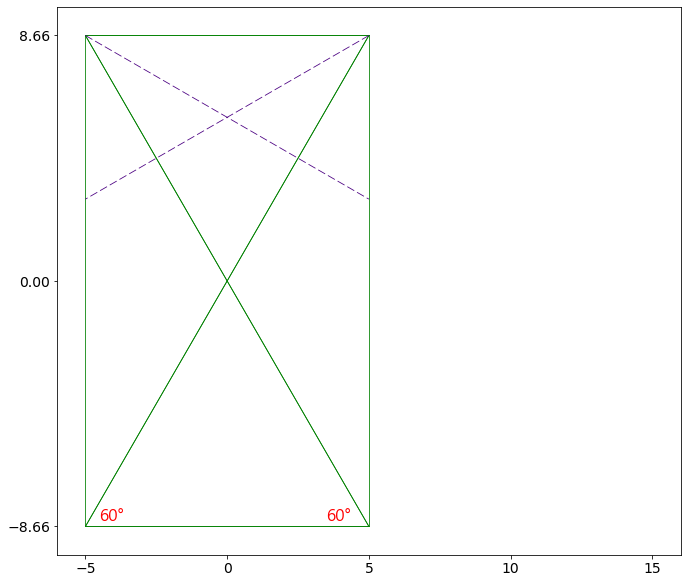

In [3]:
# (home)/Anthony-J-Lee/
# A_J_Lee_pattern-1.ipynb
# 2021-04-30
# python 3.8.2
#
# run on https://repl.it
# run on ubuntu 18.04 LTS
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.font_manager as fontManager
from shapely import affinity
from shapely.geometry import LineString, Point
#
# 定義圖面函數
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.6   # cm
    right_margin = 1.6  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.6    # cm
    bottom_margin = 1.6 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
    #
# end of def
#
# Define the arc
# center position is cxy = (cx, cy)
# start_angle, end_angle is in degrees
#
def shapely_Arc(cxy, r, start_angle, end_angle) :
    #
    numsegments = 1440
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
    #
# end of def
#
# ------------------------------------------------------------
#
# A4 紙張大小是 21.0cm x 29.7cm
# dy = r0+ty
dx = 5.0
dy = 8.660254037844386
tup7 = set_graphic_area(4*dx+2, 2*dy+2)
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1]))
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
# 設定X軸的顯示範圍, from xmin to xmax
plot.xlim(-6, 16)
# 設定Y軸的顯示範圍, from ymin to ymax
plot.ylim(-dy-1, dy+1)
# get current axes, set X,Y same ratio & scale
plot.gca().set_aspect('equal', adjustable='box') 
#
xvalues = [-5,0,5,10,15]
yvalues = [-dy,0,dy]
plot.xticks(xvalues)
plot.yticks(yvalues)
plot.tick_params(labelsize=14)
#
plot.grid(False)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# ---------------------------------------------------------
#
r0 = 5
cxy = (0,0)
myfont = fontManager.FontProperties(fname='../Ecliptic/draw/fonts/msjh.ttc')
#
# find its_1 distance
pA = ( r0, r0)
pB = (-r0, r0)
pC = (-r0,-r0)
pD = ( r0,-r0)
#
line_1 = LineString([pA, pC])
line_2 = LineString([pB, pD])
line_3 = affinity.rotate(line_1, 15, pC)
line_4 = affinity.rotate(line_2,-15, pD)
#
its_1    = line_3.intersection(line_4)
its_1_xy = (its_1.x, its_1.y)
#
tx = 0
ty = its_1_xy[1]
#
pA = ( r0, r0+ty)
pB = (-r0, r0+ty)
pC = (-r0,-r0-ty)
pD = ( r0,-r0-ty)
#
tmp_1 = LineString([pC, cxy])
tmp_2 = LineString([pD, cxy])
tmp_3 = LineString([pC, pD])
#
for tmp in (tmp_1, tmp_2, tmp_3) :
    xs, ys = tmp.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03A.png', format="png", dpi=300)
#
for tmp in (tmp_1, tmp_2, tmp_3) :
    r_tmp = affinity.rotate(tmp, 180, cxy)
    xs, ys = r_tmp.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03B.png', format="png", dpi=300)
#
square_xy = [pA, pB, pC, pD, pA]
square    = LineString(square_xy)
#
line_1 = LineString([pA, pC])
line_2 = LineString([pB, pD])
#
# now its_1 will be cxy
#
for item in (square, line_1, line_2) :
    xs, ys = item.xy
    ax.plot(xs, ys, color='green', alpha=1.0, linewidth=0.8, solid_capstyle='round', zorder=10) 
# end for
#
plot.savefig('./png/fig-03C.png', format="png", dpi=300)
#
text2_xy = (r0-1.5, -r0-ty+0.2)
ax.annotate("60°", text2_xy,
            color='red',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
text3_xy = (-r0+0.5, -r0-ty+0.2)
ax.annotate("60°", text3_xy,
            color='red',
            fontproperties=myfont,
            fontsize=16, 
            zorder=10)
#
plot.savefig('./png/fig-03D.png', format="png", dpi=300)
#
line_AD = LineString([pA, pD])
line_AB = LineString([pA, pB])
line_BC = LineString([pB, pC])
line_CD = LineString([pC, pD])
#
line_AC = LineString([pA, pC])
line_AC_rN30 = affinity.rotate(line_AC,-30, pA)
#
its_D= line_AC_rN30.intersection(line_BC)
its_D_xy = (its_D.x, its_D.y)
#
line_A_itsD = LineString([pA, its_D_xy])
xs, ys = line_A_itsD.xy
ax.plot(xs, ys, color='indigo', alpha=1.0, linewidth=0.8, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
plot.savefig('./png/fig-03E.png', format="png", dpi=300)
#
mid_A_itsD  = line_A_itsD.interpolate(0.5, normalized = True)
r_P120_line_A_itsD = affinity.rotate(line_A_itsD, 120, mid_A_itsD)
#
xs, ys = r_P120_line_A_itsD.xy
ax.plot(xs, ys, color='indigo', alpha=1.0, linewidth=0.8, dashes=[10, 4, 10, 4], solid_capstyle='round', zorder=20)
#
plot.savefig('./png/fig-03F.png', format="png", dpi=300)
#